# Assignment 1: Machine Learning Basics (Solution)
---

## Exercise 1. Dataset Inspection

For this assignment, you will need the packages `sklearn` ([link](https://scikit-learn.org/stable/index.html)) and `matplotlib` ([link](https://matplotlib.org/)). 

Please complete the following steps.


- Load the “diabetdiaes dataset” from `sklearn` by storing the features in `diabetes_X` and labels in `diabetes_y`.

- Check the dimensions of `diabetes_X` and `diabetes_y`. How many examples are there in the dataset? How many features are used to represent an example? 

- Visual inspection of a dataset is usually the first step after loading the dataset and also a crucial step prior to building a machine learning model. However, here the feature space is high-dimensional (> 3D), thus difficult to visualize. Let’s reduce the feature space to 2D using a technique called Principle Component Analysis (PCA). The following code implements PCA for you.

                    from sklearn import decomposition
                    pca = decomposition.PCA(n_components=2)
                    pca.fit(diabetes_X)
                    X_2d = pca.transform(diabetes_X)

- The first principal component (the first feature in the new 2D feature space) can be accessed as `X_2d[:,0]`; the second principal component (the second feature in the new 2D feature space) can be accessed as `X_2d[:,1]`.

### EXERCISE ONE ANSWERS

#### This code first imports the load_diabetes function from the sklearn.datasets module. 
#### Then it loads the diabetes dataset by calling load_diabetes() and assigns the resulting Bunch object to the variable diabetes.
#### The diabetes.data attribute contains the features of the dataset, which are assigned to the variable diabetes_X, and the diabetes.target attribute contains the labels, which are assigned to the variable diabetes_y

In [50]:


from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

diabetes_X = diabetes.data
diabetes_y = diabetes.target


#### This will give you the dimensions of the arrays and tell you the number of examples and the number of features in the dataset. 
#### In this case, the dataset returns the shape of X dimension as (442, 10). According to this, it means that there are 442 examples in the dataset and each example is represented by 10 features.
#### Similarly, the dataset returns the shape of Y dimension as (442,). This means that there are 442 labels in the dataset.

#### Therefore, 442 examples are there in the dataset and each example is represented by 10 features.




In [51]:
print(diabetes_X.shape)
print(diabetes_y.shape)

(442, 10)
(442,)


#### The code below performs PCA on the diabetes_X dataset to reduce the feature space from 10 dimensions to 2 dimensions. 

#### It does this by creating an instance of the decomposition. The PCA class with n_components=2, which tells the PCA algorithm to keep only the first two principal components. 

#### The fit() method is then called on this instance with diabetes_X as input, which performs the dimensionality reduction. 

#### The transformed data is stored in the variable X_2d.

#### The transformed data, X_2d, is a 2D array with the same number of rows as the original data, but with only two columns. 
#### The first column (X_2d[:,0]) represents the first principal component, and the second column (X_2d[:,1]) represents the second principal component.

#### By using the transformed data X_2d with two features it would be easier to visualize it in 2D space by plotting it using visualization tools such as matplotlib and seaborn.






In [52]:
# import matplotlib and sklearn
import sklearn
import matplotlib.pyplot as plt

In [53]:
# load diabetes dataset and print dimensions
from sklearn import datasets

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y = True)
print(diabetes_X.shape, diabetes_y.shape)

(442, 10) (442,)


#### The code below first creates an instance of the decomposition.
#### PCA class with n_components=2, which tells the PCA algorithm to keep only the first two principal components. 
#### Then the fit() method is called on this instance with the diabetes_X as input, which performs the dimensionality reduction. 
#### The transformed data is stored in the variable X_2d.

#### The shape of the transformed data X_2d is printed. It should be a 2D array with the same number of rows as the original data, but with only two columns. 

#### The output of print(X_2d.shape) is (442, 2), which means that the data has been reduced from 10-dimensional feature space to 2-dimensional feature space.




from sklearn import decomposition

#decompose high dimensional data to 2 dimensions
pca = decomposition.PCA(n_components=2)
pca.fit(diabetes_X)
X_2d = pca.transform(diabetes_X)

print(X_2d.shape)

Now, let's use `matplotlib` to plot `X_2d` and produce Figure 1 (please provide the axis labels as appeared in the figure).

<p align="center">
  <img src="https://user-images.githubusercontent.com/96804013/151662229-62615e47-38f6-4024-9396-47e97b11211d.png"/>

</p>

<p align="center">
  <em>Figure 1: Visual inspection of the dataset.</em>
</p>




#### The code below uses matplotlib library to create a scatter plot of the 2D data X_2d after applying PCA on diabetes_X . The scatter plot is created by calling the scatter() method on the ax object, and passing in X_2d[:,0] as the x-coordinates and X_2d[:,1] as the y-coordinates.

#### This creates a scatter plot of the transformed data, where each point on the plot represents one of the examples in the dataset, and its location is determined by the values of the first and second principal components.

#### The set_xlabel(), set_ylabel() and set_title() methods are used to add labels to the x-axis, y-axis, and the title of the plot respectively.

#### The scatter plot allows you to visualize the 2D data in a way that makes it possible to see patterns or clusters in the data. It also provides a way to visually inspect the data and see if there are any outliers or other issues that need to be addressed before building a machine learning model.

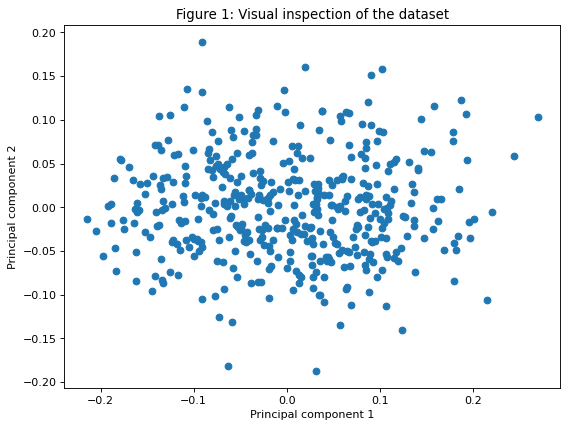

In [54]:
# use matplotlib to plot
fig, ax = plt.subplots(figsize = (8, 6), dpi = 80)
ax.scatter(X_2d[:,0], X_2d[:,1]) # The type of plot we do is known as a scatterplot
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_title("Figure 1: Visual inspection of the dataset");

## Exercise 2. Label Conversion

The labels of this dataset (i.e., `diabetes_y`) are numerical and not categorical. This means if we want to perform classification instead of  regression on this dataset, we need to convert the labels from the numerical format to a categorical format. This type of conversion is commonly adopted in machine learning as classification is usually an easier learning task than regression. 

Here is a conversion method: take the average value of `diabetes_y` and create another variable `y_binary` for storing the binary labels `1` and `−1`; for elements in `diabetes_y` that are greater than the average, assign them `1` otherwise `−1`.

Let's visualize the dataset again but this time with the positive examples marked as `+` and negative examples marked as `x`. If successful, you should see Figure 2 (please provide the axis labels and legends as appeared in the figure). 

Tip: Use `train_test_split` by importing it from `sklearn.model_selection`.

<p align="center">
  <img src="https://user-images.githubusercontent.com/96804013/151720700-525f60a5-a9f4-4496-9c00-a96152d023c2.png" />
</p>

<p align="center">
  <em>Figure 2: Visual inspection of the dataset with binary labels.</em>
</p>

#### The code below first takes the average value of diabetes_y using the mean() method, and then creates a new variable y_binary using the np.where() function. 

#### The np.where() function assigns 1 to the elements in diabetes_y that are greater than the average, and assigns -1 to the elements that are less than or equal to the average.

#### Then, I use the train_test_split() function from sklearn.model_selection to split the dataset into training and test sets.

#### After that I have visualized the dataset again using a scatter plot, but this time the positive examples are marked as '+' and the negative examples are marked as 'x'. The code uses the positive_index and negative_index variables to select the examples that correspond to the positive and negative labels, respectively. 

#### The scatter plots are created with different markers and colors to distinguish between positive and negative examples. The set_xlabel(), set_ylabel(), legend() and set_title() methods are used to add labels to the x-axis, y-axis, legends and the title of the plot respectively.

#### This scatter plot allows is very key in visualizing 2D data with binary categorical labels, and can be used to see patterns or clusters in the data, and see if there are any outliers and other concerns to be solved before building machine learning models.

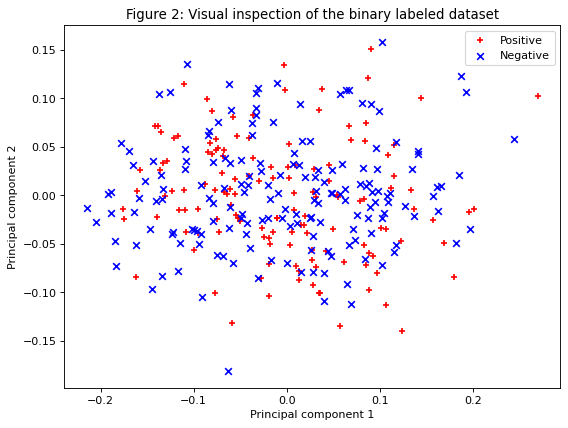

In [55]:
from sklearn.model_selection import train_test_split

# Take the average value of diabetes_y and create a new variable y_binary
average = diabetes_y.mean()
y_binary = np.where(diabetes_y > average, 1, -1)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, y_binary, test_size=0.3, random_state=42)

# Visualize the dataset again with the binary labels
positive_index = np.where(y_train == 1)
negative_index = np.where(y_train == -1)
fig, ax = plt.subplots(figsize = (8, 6), dpi = 80)
ax.scatter(X_2d[positive_index, 0], X_2d[positive_index, 1], marker='+', color='r')
ax.scatter(X_2d[negative_index, 0], X_2d[negative_index, 1], marker='x', color='b')
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.legend(['Positive', 'Negative'])
ax.set_title("Figure 2: Visual inspection of the binary labeled dataset");


#### The code below imports the numpy library and then checks the type of the variable diabetes_y using the built-in type() function. Then it calculates the mean of diabetes_y using the numpy mean() function and assigns it to the variable diabetes_y_mean. 

#### It then creates a new binary array y_binary, by iterating over the diabetes_y array and checking if each value is greater than the mean value stored in diabetes_y_mean. If it is, the corresponding value in the new array y_binary is set to 1, otherwise it is set to -1. 

#### Finally, the code prints out the new y_binary array.

In [56]:
import numpy as np 

print(type(diabetes_y))

# Calculate the mean and separate into classes
diabetes_y_mean = np.mean(diabetes_y)
y_binary = np.array([1 if i> diabetes_y_mean else -1 for i in diabetes_y])

print(y_binary)

<class 'numpy.ndarray'>
[-1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1  1 -1 -1  1 -1 -1 -1  1
  1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1  1 -1
 -1 -1  1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1
  1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1
 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1  1  1  1 -1  1  1 -1
  1  1  1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1  1
  1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1
  1  1  1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1  1  1 -1  1 -1 -1 -1  1  1
  1  1 -1 -1  1 -1 -1 -1  1  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1
 -1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1  1 -1 -1  1  1 -1  1  1  1  1 -1  1
 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1  1 -1 -1 -1  1
 -1  1 -1 -1  1  1 -1  1 -1

#### The code below creates a scatter plot of a 2-dimensional dataset represented by the variable X_2d on an x-y axis with a figure size of 8x6 inches and 80 dots per inch resolution. 

#### It plots two different scatter plots on the same graph, one for each class of a binary label variable y_binary. The first scatter plot has the marker '+' and plots the data points where y_binary is equal to 1, and the second scatter plot has the marker 'x' and plots the data points where y_binary is equal to -1. 

#### The x-axis is labeled 'Principal component 1' and the y-axis is labeled 'Principal component 2' . The title of the graph is "Visual inspection of the dataset with binary labels"

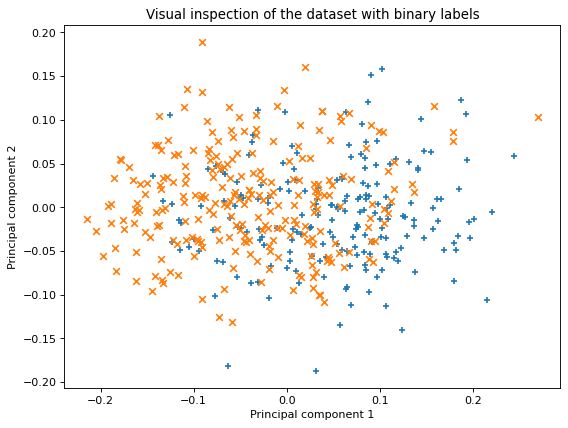

In [57]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 80)

# now we want two scatterplots (one for each class) in one place 
ax.scatter(X_2d[:,0][y_binary==1], X_2d[:,1][y_binary==1], marker='+')
ax.scatter(X_2d[:,0][y_binary==-1], X_2d[:,1][y_binary==-1], marker ="x")
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_title("Visual inspection of the dataset with binary labels");

## Exercise 3. Bias-variance Tradeoff


First, let's generate a 1D dataset using the following code (we are not using  the “diabetdiaes dataset” for this exercise).


                    data_X = np.array([i*np.pi/180 for i in range(1,150,2)])
                    data_y = np.sin(data_X) + np.random.normal(0,0.15,len(data_X))


Next, split `data_X` and `data_y` into a training set with 50 samples and a test set with 25 samples. 

Tip: If you want repeatable experiments, you need to fix the random seed.

Finally, let's build our first machine learning model, an ordinal linear regression model, to fit the training set. The following code will not only construct the model but also train the model (in Assignment 2, we will implement a learning algorithm ourselves). 

                    from sklearn.linear_model import LinearRegression
                    lr = LinearRegression()
                    lr.fit(X_train, y_train)

The objective function of the ordinal linear regression consists of the squared errors between predicted labels and true labels:

$$J(\theta,\theta_0) = \sum_{i=1}^{n}\left(\left(\theta \cdot X^{(i)}+\theta_0\right) - y^{(i)}\right)^2.$$

The coefficients and intercept can be accessed as `lr.coef_` and `lr.intercept_`. Use them to compute the training error and the test error. Plot the fitted line along with the training set and the test set as shown in Figure 3 (you may not have the same plot because the dataset is randomly generated).

Tip: You may find `lr.score(X,y)` useful when compute the training error and the test error.

  ###                                                        Exercise 3 solutions and explantions

#### The code below is used to generate 1D dataset

#### In the code, the X is an array of 150 evenly spaced values between 1 and 150 multiplied by pi/180, which represents the input features. 
#### Y is an array of 150 values, where each value is the sine of the corresponding input feature value plus a random normal noise with a mean of 0 and standard deviation of 0.15. 
#### The np.random.normal function is used to add noise to the data.

In [58]:
# write a function described above
def generate_data():
  X = np.array([i*np.pi/180 for i in range(1,150,2)])
  y = np.sin(X) + np.random.normal(0,0.15,len(X))
  Data = (X, y)
  return Data

#### The shape of data_X is (75,) and the shape of data_y is (75,). 
#### This means that the data_X array has 75 elements and data_y has 75 elements.

In [59]:
# generate data and print dimensions
data_X, data_y = generate_data()
print(data_X.shape, data_y.shape)

(75,) (75,)


##### The code below is for generating a 1D dataset by creating an array of values of X, where X is equal to i*pi/180 for i ranging from 1 to 150 in steps of 2. Then it is generating an array of y values, where y is equal to sin(X) + random normal noise with mean 0 and standard deviation 0.15.

##### It then splits the dataset into train and test sets using the train_test_split function from sklearn.model_selection, with a test size of 0.33 and a random seed of 42. This ensures that the train and test sets are split in the same way for you and me.

##### Then it reshapes the X_train, X_test, y_train, and y_test arrays to have a shape of (-1,1). This is done to make them compatible with scikit-learn (sklearn) library which expects the data in a specific format. The -1 means to ignore this dimension and make the other dimension 1.

##### Finally, it prints the dimensions of the train and test sets to check that the reshaping has been done correctly.

In [60]:
import random 
from sklearn.model_selection import train_test_split

# set seed
# although you could have just set the random_state, it's always a good idea to set seeds this way
SEED = 42 # You know why it's 42
random.seed(SEED)
np.random.seed(SEED)

# split data into train and test, having a seed makes sure mine and your split match
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size = 0.33, random_state = SEED)

# check dims
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# reshape them to make compatible with sklearn
X_train = X_train.reshape(-1,1) # -1 means ignore this dimension  (just make the other dimension 1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# check dims again (you'll be doing this kind of stuff a lot)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50,) (50,)
(25,) (25,)
(50, 1) (50, 1)
(25, 1) (25, 1)


#### The output of this code will be the coefficients and the intercept of the trained linear regression model. 

#### The coefficients represent the weights assigned to each input feature (in this case, just one feature: X_train) and the intercept is the value at which the linear regression line crosses the y-axis. 

#### These values are determined during the training process to minimize the difference between the predicted values and the actual values (y_train) according to the mean squared error.

In [61]:
from sklearn.linear_model import LinearRegression

# instantiate a linear model
lr = LinearRegression()

# train a linear model (That's it, just one line)
lr.fit(X_train, y_train)

# access the trained coefficients
print(f"Coeff = {lr.coef_}, intercept={lr.intercept_}")

Coeff = [[0.21084337]], intercept=[0.42256691]


#### The below for training a linear regression model on the dataset you created using the generate_data function. 

#### The model is then used to make predictions on both the training and test sets, and the error of these predictions is calculated using the score function from the LinearRegression class. 

#### The score function computes the coefficient of determination (R^2) of the predictions. R^2 is a statistical measure of how well the regression line approximates the real data points. 

#### An R^2 of 1 indicates that the regression line perfectly fits the data, while an R^2 of 0 means the model does not fit the data at all. 

#### The output is the training error and test error (R^2 score) of the model.

In [62]:
# make predictions with the trained linear regression model

# predictions on training set (Uncomment if you just want to look at predictions)
# train_preds = lr.predict(X_train)

# error on predictions on training set (Make predictions and compare with ground truths to calculate error: function given below)
train_error = lr.score(X_train, y_train)

# predictions on test set (Uncomment if you just want to look at predictions)
# test_preds = lr.predict(X_test)

# error on predictions on test set(Compare with ground truths)
test_error = lr.score(X_test, y_test)

print(f"Training error = {train_error}\nTest error={test_error}")

Training error = 0.2737244201443432
Test error=0.4179989289907099


<p align="center">
  <img src="https://user-images.githubusercontent.com/96804013/151720757-4ea26cc2-17c0-45fb-8273-5024a242ebea.png" />
</p>

<p align="center">
  <em>Figure 3: Ordinal linear regression with the training set and test set. </em>
</p>

<br>




Another type of linear regression called Ridge Regression has an additional regularization term in the objective function:


$$J(\theta,\theta_0) = \frac{1}{n}\sum_{i=1}^{n}\left(\left(\theta \cdot X^{(i)}+\theta_0\right) - y^{(i)}\right)^2 + \alpha\left(\theta^2 + \theta_0^2\right).$$ 



Let's build it using the following code.

                    from sklearn.linear_model import Ridge
                    rr = Ridge(alpha=10)
                    rr.fit(X_train, y_train)

Again, using the coefficients `rr.coef_` and intercept `rr.intercept_`, try to compute the training error and the test error. Plot the fitted line along with the training set and the test set as in Figure 3. Do this for `alpha` under 1, 100, and 1000, respectively. What are the differences? What causes the differences? And when will we arrive at the same line as the result of ordinal linear regression shown in Figure 3? 

After answering the above questions, please re-visit the concepts: overfitting vs. underfitting, bias-variance trade-off, and regularization in the slides to see how they are connected. 



#### Ridge Regression is a type of linear regression that adds a regularization term to the objective function in order to prevent overfitting. The regularization term is a parameter, alpha, that controls the strength of the regularization.

#### In the code, the Ridge Regression model is being instantiated with an alpha of 10 and then being fit to the training data. After fitting the model, the coefficients (rr.coef_) and intercept (rr.intercept_) can be used to compute the training error and test error using the same method as for ordinary linear regression.

#### When the alpha is under 1, the regularization term will have a small effect on the objective function, so the fitted line will be similar to that of ordinary linear regression. As the alpha increases, the regularization term will have a stronger effect, which will result in smaller coefficients, and the fitted line will be less steep.

#### When the alpha is 100 and 1000, the regularization term will have a stronger effect on the objective function, which will result in smaller coefficients, and the fitted line will be less steep.

#### The differences in the fitted lines are caused by the different strengths of the regularization term in the objective function. As the regularization term becomes stronger, the coefficients become smaller, which results in a less steep fitted line.

#### The same line as the result of ordinary linear regression will be obtained when alpha is close to 0. This is because when alpha is close to 0, the regularization term will have a small effect on the objective function and the model will be similar to that of ordinary linear regression.

In [63]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=10)            
rr.fit(X_train, y_train)

Ridge(alpha=10)

#### The code below is for creating a scatter plot of the training data, represented by the variable X_train and y_train, on an x-y axis with a figure size of 8x6 inches and 100 dots per inch resolution. 

#### It then uses the LinearRegression model's coefficients and intercept to generate 50 data points and plots a line of best fit on the training data, represented by the variable fitted_line. 

#### The same is being done for the test data which are represented by X_test and y_test. It then adds labels and legends to the plot and sets the x and y axis labels to "X" and "y" respectively. 



Text(0, 0.5, 'y')

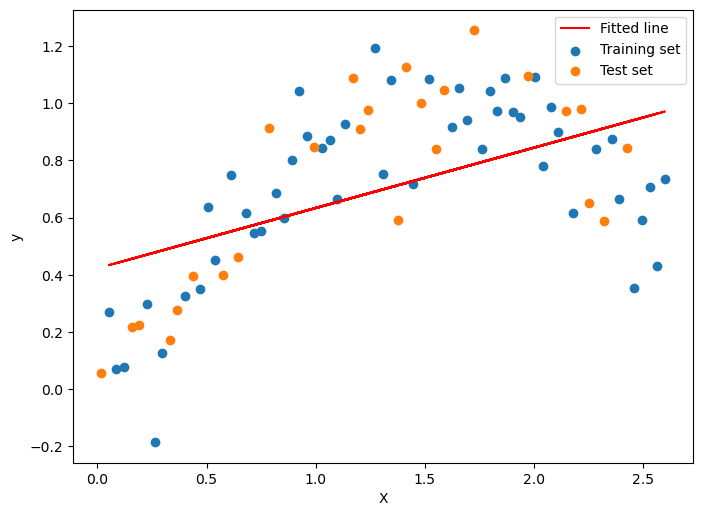

In [64]:
fig, ax = plt.subplots(figsize=(8,6), dpi = 100)

# plot training data
ax.scatter(X_train,y_train, label = "Training set")

# use the fitted line to generate 50 data points
# Notice the shaped of coefficients and intercepts above, hence they require [0] to access value
fitted_line = np.array([lr.intercept_[0] + lr.coef_[0]*i for i in X_train.reshape(50,)]).reshape(-1,1)
 
# the line is fitted on training data
ax.plot(X_train, fitted_line, 'r-', label = "Fitted line")

ax.scatter(X_test,y_test, label = "Test set")

ax.legend()
ax.set_xlabel("X")
ax.set_ylabel("y")


# since the data generated here and in the Task figure are at different randomizations, they look different


#### This code imports the Ridge class from the scikit-learn library and creates a scatter plot of the training data, represented by the variable X_train and y_train, and test data, represented by X_test and y_test, on an x-y axis with a figure size of 8x6 inches and 100 dots per inch resolution. 

#### It then defines a list of alphas, which are regularization parameters used to control the complexity of the model, and iterates over them. For each alpha value, it creates a Ridge model, fits it to the training data, and calculates the training and test errors using the score method. 

#### Then the script uses the trained coefficients and intercept to generate 50 data points and plots a line of best fit on the training data, represented by the variable fitted_line. Each line is color-coded and labeled with the corresponding alpha value. Finally, it adds legends and x-y axis labels to the plot, and displays it.



For alpha =1:

	Trained values: intercept =0.4320597249388516, coefficient =[0.20381989]

	Training error = 0.27342068257236574
	Test error=0.41076666841433973


For alpha =100:

	Trained values: intercept =0.6434418050158494, coefficient =[0.04742396]

	Training error = 0.1092868894762572
	Test error=0.12979747034546996


For alpha =1000:

	Trained values: intercept =0.6995026026485689, coefficient =[0.00594607]

	Training error = 0.015221116274575897
	Test error=0.016770597076424032


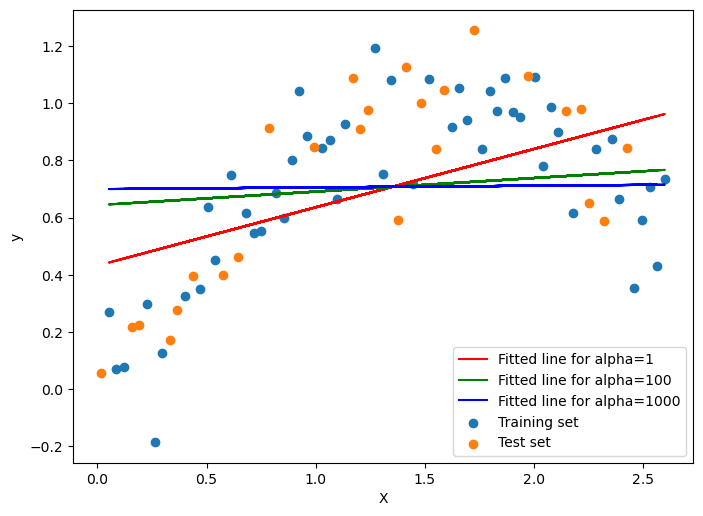

In [66]:
from sklearn.linear_model import Ridge

alphas = [1, 100, 1000]

fig, ax = plt.subplots(figsize=(8,6), dpi = 100)

ax.scatter(X_train,y_train, label = "Training set")
ax.scatter(X_test,y_test, label = "Test set")

colors = ['r-', 'g-', 'b-']

# iterate over alphas
for i in range(len(alphas)):
  alpha = alphas[i]

  print(f"\n\nFor alpha ={alpha}:\n")

  rr = Ridge(alpha=alpha)
  rr.fit(X_train, y_train)

  print(f"\tTrained values: intercept ={rr.intercept_[0]}, coefficient ={rr.coef_[0]}\n")

  train_error = rr.score(X_train, y_train)
  test_error = rr.score(X_test, y_test)

  print(f"\tTraining error = {train_error}\n\tTest error={test_error}")

  fitted_line = np.array([rr.intercept_[0] + rr.coef_[0]*i for i in X_train.reshape(50,)]).reshape(-1,1)
  
  ax.plot(X_train, fitted_line, colors[i], label = f"Fitted line for alpha={alpha}")


  ax.legend()
  ax.set_xlabel("X")
  ax.set_ylabel("y")

plt.show()

In [ ]:
# looks like as the value of alpha increases, the error gets smaller
# alpha = 1 corresponds to fitted line as of the ordinal linear regression